# Формирование модели монетизации игрового приложения «Космические братья»

## Материалы
* [Презентация](https://drive.google.com/file/d/13KxxvIDbvBjSUUyeqWaYWkdlsHQylTQL/view?usp=sharing)
* [Дашборд](...)

Задача:
 * Сформировать модель монетизации игрового приложения основанную на рекламе во время игрового события выбора здания для постройки.
   * Многие игры зарабатывают с помощью рекламы. И все они сталкиваются с противоречием;  
   * Пользователь разозлится и уйдёт, если начать показывать ему рекламу раньше, чем игра его затянет.  
   * Но чем позже создатели игры включат рекламу, тем меньше они заработают.

Доп. параметры:   
* От модели не требуется максимизации выгоды, тк. это только первый уровень игры, окупаемости рекламы на привлечение пользователей достаточно.
    * Реклама не должна негативно влиять на удержание пользователей.
    * Доход от модели должен окупать рекламу.
* Каждый пользователь может много раз биться с противником, что бы пройти 1й этап.
    * Постройка базы идет отдельно от битвы. А вот битва идет сессионно.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import pi
import scipy.stats as st

In [2]:
ga_df = pd.read_csv('/datasets/game_actions.csv')
ac_df = pd.read_csv('/datasets/ad_costs.csv')
us_df = pd.read_csv('/datasets/user_source.csv')

In [3]:
screen_counter = 0

## Предобработка данных

### Таблица с действиями пользователей

In [4]:
ga_df.sample(30)

,event_datetime,event,building_type,user_id,project_type
134771,2020-05-25 16:26:23,finished_stage_1,NaN,74c32470-d9b0-4445-959f-2fe99292b6b5,NaN
105466,2020-05-14 11:28:34,building,research_center,0a1276c5-b7c0-4d2a-b5ff-2a220cab7d05,NaN
38633,2020-05-08 01:17:45,building,spaceport,830f6f56-9a2b-4d1a-bb75-7bee4be87564,NaN
51901,2020-05-09 03:34:19,building,spaceport,17c627af-399a-4e23-9e40-4e716a9c06a0,NaN
77659,2020-05-10 22:55:03,building,assembly_shop,1a1ff8d9-c475-456f-bde9-b4a0899d51d6,NaN
86015,2020-05-11 22:26:41,building,spaceport,f31ce983-433f-42fa-b60c-4d9743117812,NaN
117806,2020-05-16 12:54:40,building,spaceport,de1897fb-f020-4b18-af2e-dc5a2d10c853,NaN
36651,2020-05-07 21:07:54,building,spaceport,73f83bac-838e-49d2-81d1-636201306259,NaN
37899,2020-05-07 23:46:42,building,assembly_shop,cf7388ee-8573-4fcc-89dc-c76cf18d6fa5,NaN
79815,2020-05-11 04:05:42,building,spaceport,c755b681-5585-424f-b8cc-cf0289c055ab,NaN


In [5]:
ga_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB


Проверка что все nan в project_type это остальные строения и нет проектов с типом nan. Все nan обьясняются механикой сбора данных.

In [6]:
((ga_df['event'] == 'project') &  ~(ga_df['project_type'].isna())).sum() +\
((ga_df['event'] != 'project') &  (ga_df['project_type'].isna())).sum() == 135640 

True

Проверка, что все nan в building_type это события типа project или finished_stage_1. Т.е исследования проекта орбитальной сборки спутника или прохождение уровня 1.

In [7]:
(ga_df[(ga_df['event'] == 'project') | (ga_df['event'] == 'finished_stage_1')].index == ga_df[ga_df['building_type'].isna()].index).all()

True

Приведение типа столбца event_datetime к datetime.

In [8]:
ga_df['event_datetime'] = pd.to_datetime(ga_df['event_datetime'])

Сортировка по пользователям и порядку следовния событий.

In [9]:
ga_df = ga_df.sort_values(by=['user_id', 'event_datetime'])

In [10]:
ga_df['event_datetime'].max()

Timestamp('2020-06-05 12:32:49')

### Таблица с рекламными источниками пользователей

In [11]:
us_df.sample(30)

,user_id,source
7153,8548b197-2da3-45b0-bb11-c497d36787cb,youtube_channel_reklama
5003,5ce5bc61-cd2d-475c-be25-ff17fcc7e16f,yandex_direct
2370,2ad8537b-1ef6-4390-8749-793b3b5187fa,instagram_new_adverts
9104,ab613692-84d6-4547-a790-7b257de12a77,yandex_direct
10694,c9ac4987-19f3-4acd-ac73-37c4eab17ff4,instagram_new_adverts
7991,967437c4-f1b9-4cc2-982b-5beda9bb9a55,yandex_direct
4703,572c4172-ec91-44d9-bbd0-fe976327a0e6,facebook_ads
111,01edfdf1-6854-45af-bc88-0dfb93f5617c,facebook_ads
5601,682a2b17-cf0d-4fd3-a755-822dfa46102b,yandex_direct
5896,6e42e5d4-e8a5-4ee5-a2ba-8d685c25f271,yandex_direct


In [12]:
us_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB


In [13]:
ga_df['user_id'].nunique()

13576

Каждому пользователю соответствует источник превлечения.

### Таблица со стоимостью рекламных компаний по источнам и датам

In [14]:
ac_df

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796
5,facebook_ads,2020-05-08,68.009276
6,facebook_ads,2020-05-09,38.723350
7,instagram_new_adverts,2020-05-03,943.204717
8,instagram_new_adverts,2020-05-04,502.925451
9,instagram_new_adverts,2020-05-05,313.970984


In [15]:
ac_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


In [16]:
ac_df['day'] = pd.to_datetime(ac_df['day']).dt.floor('D')

In [17]:
ac_df['source'].unique()

array(['facebook_ads', 'instagram_new_adverts', 'yandex_direct',
       'youtube_channel_reklama'], dtype=object)

In [18]:
us_df['source'].unique()

array(['facebook_ads', 'yandex_direct', 'youtube_channel_reklama',
       'instagram_new_adverts'], dtype=object)

Каждому источнику соответствует рекламная компания.

## EDA

In [19]:
sns.set_palette(sns.color_palette("tab10"))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

### Формирование профиля пользователя

На этом этапе будут сформированы профили пользователей и вычислены промежуточные данные необходимые для анализа.

Даты первого и последнего события.

In [20]:
users_profile = ga_df.groupby('user_id').agg(
    start_datetime=pd.NamedAgg(column= 'event_datetime', aggfunc='min'),
    end_datetime=pd.NamedAgg(column= 'event_datetime', aggfunc='max')
).reset_index()

Когорта и время затраченое на прохождение первого этапа в днях.

In [21]:
users_profile['stage_1_days_spend'] = (users_profile['end_datetime'] - users_profile['start_datetime']).dt.days
users_profile['cohort'] = users_profile['start_datetime'].dt.floor('D')

#### Когорты

Деление пользователей на когорты по дню первого действия в игре.

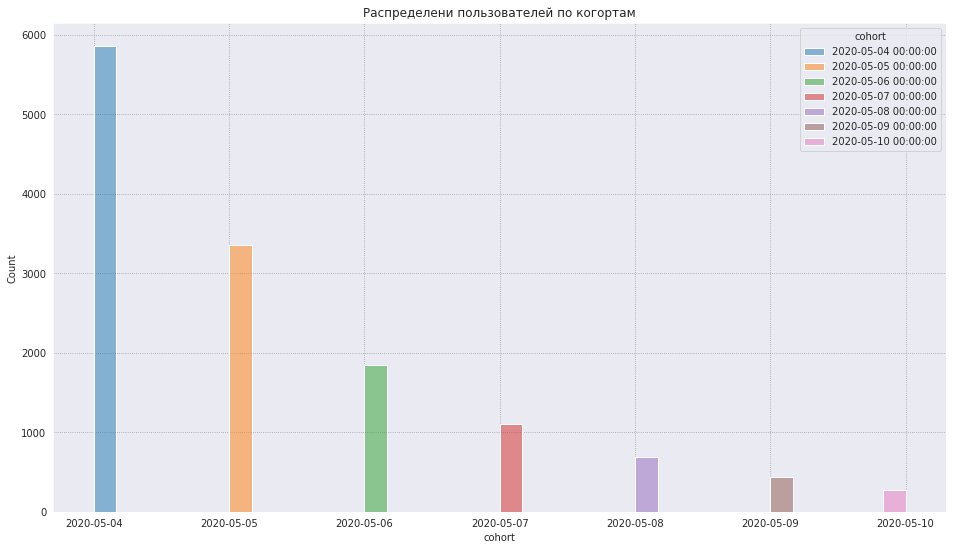

In [22]:
fig, ax = plt.subplots(figsize=(16,9))
_=sns.histplot(x='cohort', data=users_profile.sort_values(by='cohort'), hue='cohort', ax=ax).set_title("Распределени пользователей по когортам")

Как видно на графике ниже, размер когорт отражает ход рекламной компании.

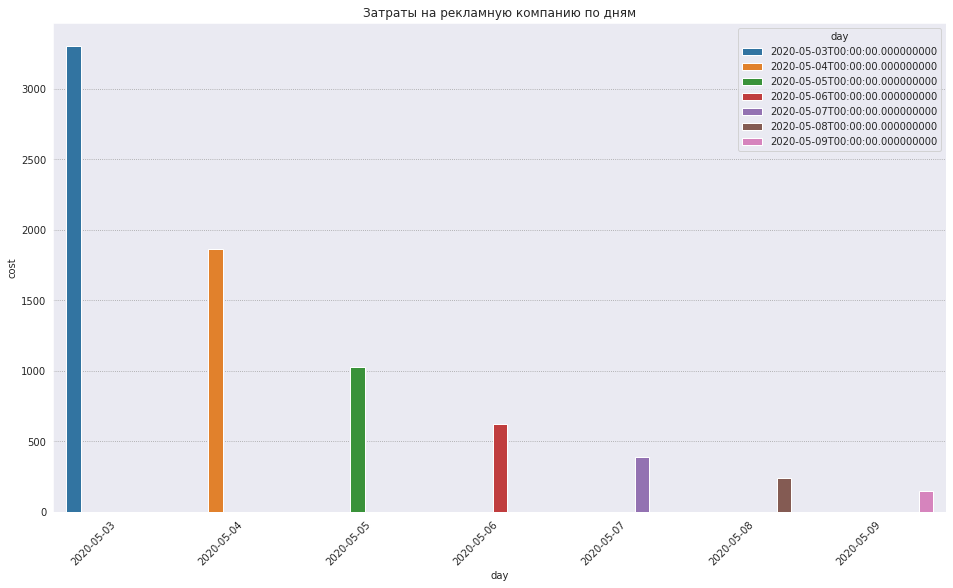

In [23]:
#Вычисляю сумарные затраты на рекламу по дням
tmp = ac_df.groupby('day')['cost'].sum().reset_index()
#График
fig, ax = plt.subplots(figsize=(16,9))
_=sns.barplot(y='cost', x='day', data=tmp, hue='day', ax=ax).set_title("Затраты на рекламную компанию по дням")
_=ax.set_xticklabels(labels=tmp['day'].dt.date, rotation=45, ha='right')

#### Источники пользователей

Необходимо разделить пользователей по источникам привличения, чтобы оценить качество этих источников в срезе целевых действий пользователя.

In [24]:
#Добавляю источники пользователей в профили.
users_profile = users_profile.set_index('user_id').join(us_df.set_index('user_id'), on='user_id').reset_index()

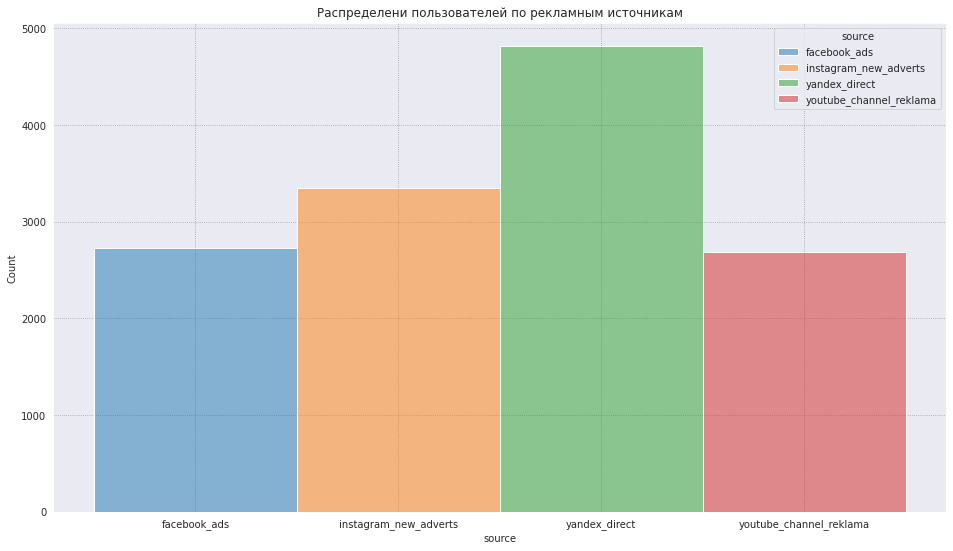

In [25]:
fig, ax = plt.subplots(figsize=(16,9))
_=sns.histplot(x='source', data=users_profile.sort_values(by='source'), hue='source', ax=ax).\
set_title("Распределени пользователей по рекламным источникам")

Среди всех выделим яндекс директ как самый крупный источник, остальные источники примерно равны.

#### Стоимость привлечения

Для начала посчитаю стоимость одного пользователя.

In [26]:
ac_df.groupby('source')['cost'].sum()/users_profile.groupby('source')['user_id'].count()

source
facebook_ads               0.785365
instagram_new_adverts      0.645785
yandex_direct              0.463590
youtube_channel_reklama    0.397662
dtype: float64

Фейсбук и инстаграм выходят наиболее дорогими источниками рекламы.

#### Оценка требующегося числа показов.

Чтобы понять сколько примерно показов рекламы в приложении необходимо, для того чтобы окупить рекламные компании, требуется посчитать затраты и поделить на стоимость показа одного ролика 0.07, согласно изначальной рекламной схеме.

In [27]:
#Сдвигаю рекламные даты на один день что бы совпасть со сформированными на след. день когортами.
ac_df['day'] = ac_df['day'] + np.timedelta64(1, 'D')

In [28]:
#users_profile = pd.merge(users_profile, us_df,  how='left', left_on=['source','cohort'], right_on = ['source','day'])

Общая стоимость всех компаний.

In [29]:
total_cost = ac_df['cost'].sum()
total_cost

7603.576986788023

Колл-во показов которое требуется для окупаемости всех компаний 108623.

In [30]:
needed_shows = (total_cost//0.07) + 1
needed_shows

108623.0

Всего 135640 показов за изучаемый период, если показывать рекламу каждый раз при постройке.

In [31]:
total_shows = len(ga_df)
total_shows

135640

Около 20% построек можно оставить без рекламы.

In [32]:
(1 - needed_shows/total_shows)*100

19.918165732822178

In [33]:
free_builds = total_shows - needed_shows
free_builds

27017.0

### Пользователи в срезе прохождения 1 уровня

#### Распределение времени затраченного на первый уровень

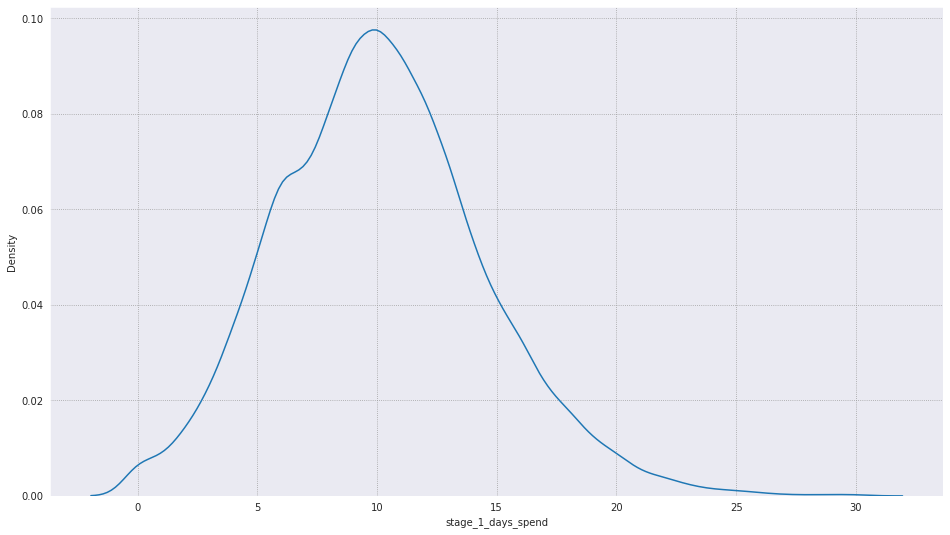

In [34]:
fig, ax = plt.subplots(figsize=(16,9))
_=sns.kdeplot(x='stage_1_days_spend', data=users_profile, ax=ax)

Форма распределения близка к нормальному. Как минимум в распределении присутсвует 2я вершина, значит будет выделяющийся срез пользователей.

#### Распределение времени затраченного на первый уровень в срезе источников

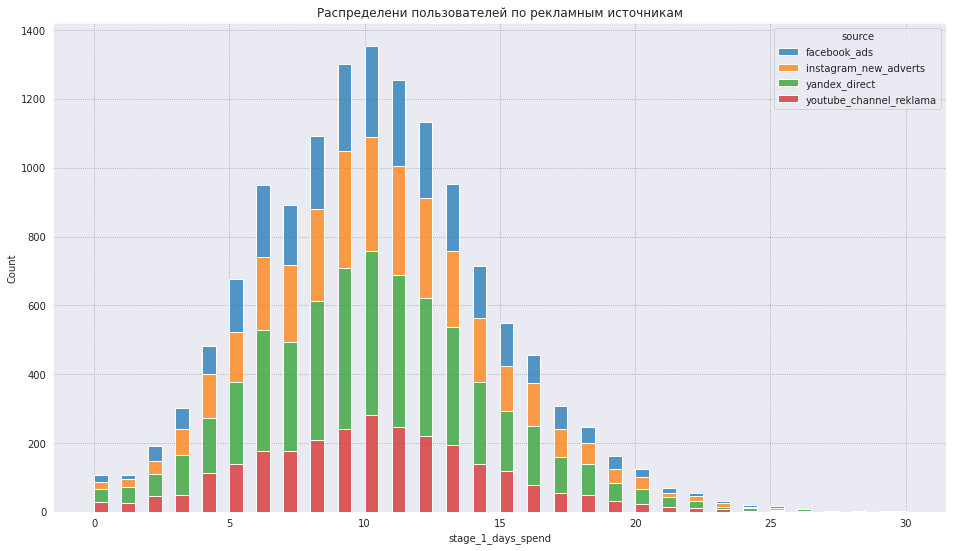

In [35]:
fig, ax = plt.subplots(figsize=(16,9))
_=sns.histplot(x='stage_1_days_spend', data=users_profile.sort_values(by='source'), hue='source',multiple='stack', ax=ax).\
set_title("Распределени пользователей по рекламным источникам")

Значимых паттернов или аномалий не наблюдается. Источники распределяются во времени пропорционально. Учитывая это, от более дорогих каналов можно и отказатся. Не уверен, как это имеет отношение к формированию модели, так что просто отмечу этот факт в конце.

#### Распределение пользотвателей по способу прохождения первого уровня

Разделяю пользователей на прошедших и непрошедших 1 уровень и по способу прохождения.

In [36]:
tmp = ga_df.groupby('user_id').apply(lambda s: pd.Series({
    'finished_stage_1':
    'finished_stage_1' in s['event'].tolist()
    ,
    'finished_by_enemy': 
    (('finished_stage_1' in s['event'].tolist()) &
    (~('project' in s['event'].tolist()))) == True
})).reset_index()

In [37]:
tmp['finished_by_project'] = (~tmp['finished_by_enemy'])&tmp['finished_stage_1']

In [38]:
tmp['stage_1_finish'] = tmp.apply(lambda r: 
                                  'not_finished' if not r['finished_stage_1'] else
                                  'finished_by_enemy' if r['finished_by_enemy'] else
                                  'finished_by_project'
                                  ,axis=1)
tmp.drop(inplace=True, columns=['finished_stage_1','finished_by_enemy','finished_by_project'], axis=1)

In [39]:
users_profile = users_profile.set_index('user_id').join(tmp.set_index('user_id')).reset_index()

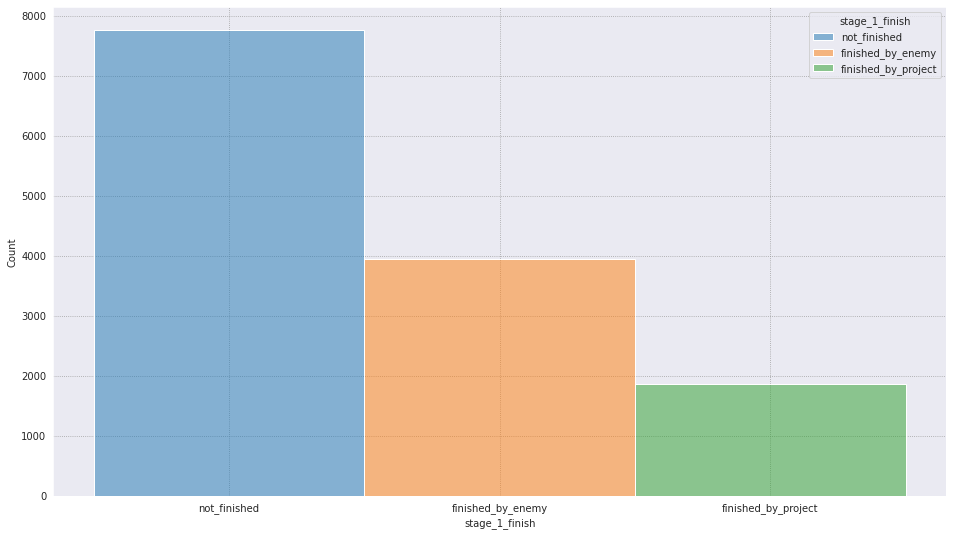

In [40]:
fig, ax = plt.subplots(figsize=(16,9))
_=sns.histplot(x='stage_1_finish', data=users_profile, hue='stage_1_finish', ax=ax)

#plt.savefig(f'screen{screen_counter}.png'.format(screen_counter), bbox_inches='tight', dpi=120)
#screen_counter +=1

In [41]:
(1 - (users_profile['stage_1_finish'] == 'not_finished').sum()/users_profile.shape[0])*100

42.847672362993514

Довольно много пользователей прошли 1й этап. Конверсия почти 50%.

#### Распределение пользотвателей по способу прохождения первого уровня в срезе источников

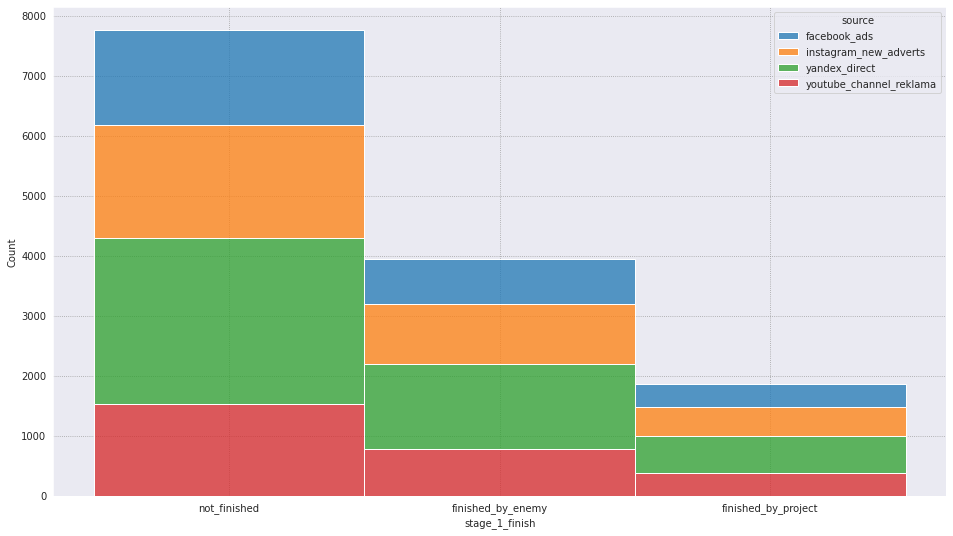

In [42]:
fig, ax = plt.subplots(figsize=(16,9))
_=sns.histplot(x='stage_1_finish', data=users_profile.sort_values(by='source'), hue='source',multiple='stack', ax=ax)

Источники распределяются пропорционально, аномалий нет. Опять же, смысла переплачивать нет.

#### Распределение времени затраченного на первый уровень в срезе способа прохождения

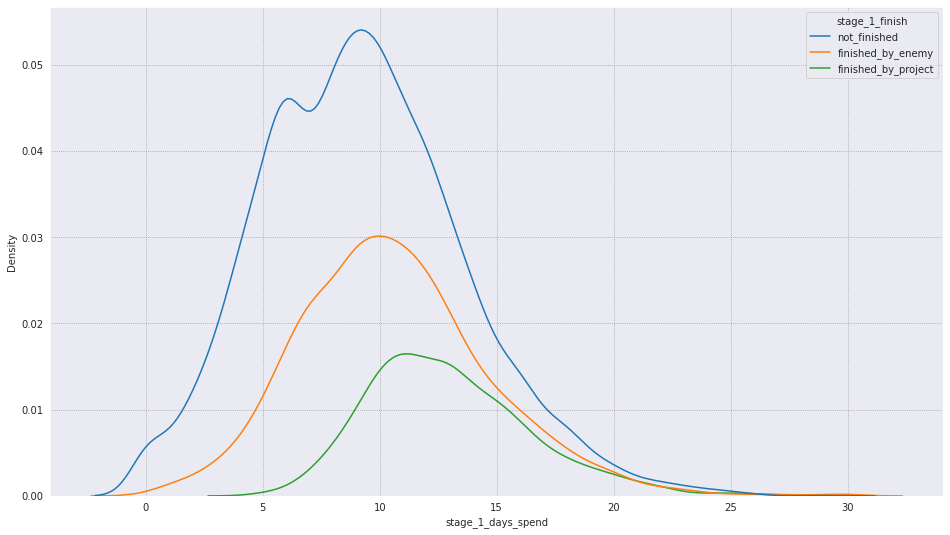

In [43]:
fig, ax = plt.subplots(figsize=(16,9))
_=sns.kdeplot(x='stage_1_days_spend',hue='stage_1_finish', data=users_profile, ax=ax)

#plt.savefig(f'screen{screen_counter}.png'.format(screen_counter), bbox_inches='tight', dpi=120)
#screen_counter +=1

Распределения имеют форму нормального. Видно, что среднее время игры пользователей, заканчивающих проектом, на несколько дней больше тех, кто заканчивает победой над противником. Такая гипотеза будет проверена на соответствующем этапе.

### Пользователи в срезе времени совершения игровых событий

Необходимо понять поведение пользователей во времени, чтобы понять, когда показывать рекламу выгоднее с точки зрения не увеличения оттока.

In [44]:
ga_df = ga_df.join(users_profile.set_index('user_id'), on='user_id')

In [45]:
# Группирую события по пользователю и вычитаю из столбца с отсортированным по времени события, такой же столбец но со сдвигом на одно событие вперед.
# Получаю столбец с разницами во времени между текущим и предыдущим событием в часах.
ga_df['event_relative_time_hours'] = ga_df.groupby('user_id').apply(lambda s: pd.Series({
    'tmp': s['event_datetime'] - s['event_datetime'].shift(1)
})).explode(column='tmp').reset_index()['tmp']// np.timedelta64(1, 'h')

ga_df['event_relative_time_hours'].fillna(0, inplace=True)

In [46]:
#Добавляю событиям порядковый номер.
ga_df['event_num'] = ga_df.sort_values(by=['user_id', 'event_datetime']).groupby('user_id')['event_datetime'].rank(method='first')

#### Распределение времени прошедшего между событиями

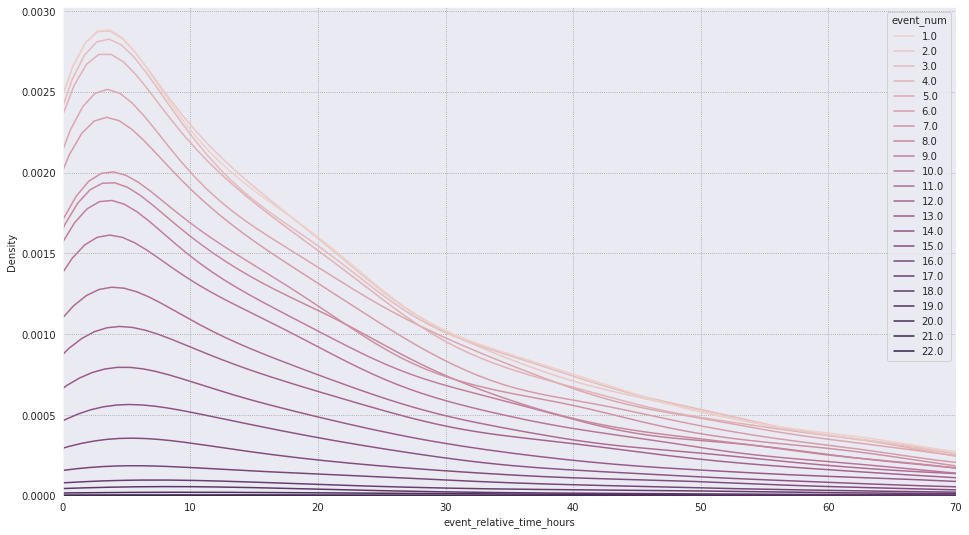

In [47]:
fig, ax = plt.subplots(figsize=(16,9))
#Смотрю поближе, когда надо закоменчиваю, что бы не плодить гарфики.
plt.xlim(0,70)
_=sns.kdeplot('event_relative_time_hours', hue='event_num', data=ga_df, ax=ax)

Распределение имеет форму нормального со смещением влево и длинным хвостом справа. Ни на каком игровом событии не возникает принципиальных различий в распределении времени между событиями, кроме уменьшения плотности пользователей с ростом числа событий. Примерно после 13 игрового события, распределение теряет свою структуру, видимо, потому что слишком мало игроков отыгрывает больше 13 событий в 1й этап.

После 5 игрового события видно некоторое снижение среднего времени, пользователи начинают строиться чаще, хвосты становятся меньше.

Возможно в срезе по способу окончания 1го этапа, будет больше информации.

#### Распределение времени прошедшего между событиями в срезе способов прохождения 1го этапа.

Тк после 13 события распределение начинает терять форму, рассмотрим 14 первых событий.

In [48]:
tmp = ga_df[ga_df['event_num']<=14]

##### Не прошедшие 1й этап

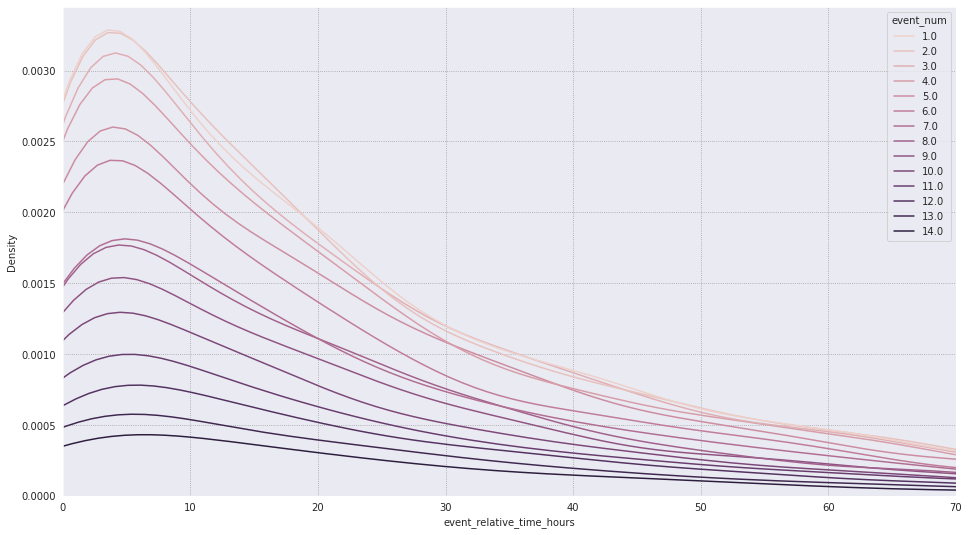

In [49]:
fig, ax = plt.subplots(figsize=(16,9))
plt.xlim(0,70)
_=sns.kdeplot('event_relative_time_hours', hue='event_num', data=tmp[tmp['stage_1_finish']== 'not_finished'], ax=ax)

In [50]:
tmp[tmp['stage_1_finish']== 'not_finished']['event_relative_time_hours'].mean()

25.164070359418346

Большинство имеющихся пользователей, распределение похоже на общее распредление(всех 3х срезов, выше), но стало более гладким.

##### Прошедшие победой над противником

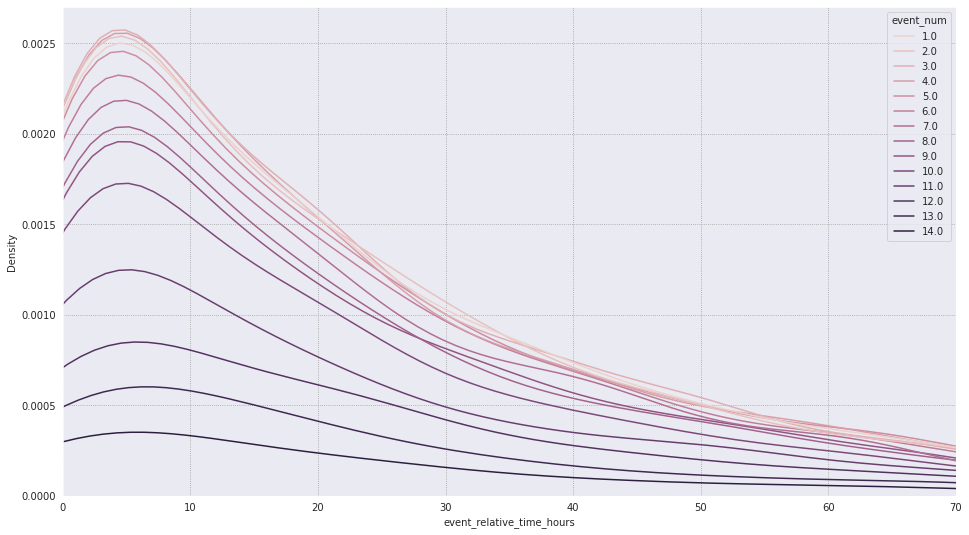

In [51]:
fig, ax = plt.subplots(figsize=(16,9))
plt.xlim(0,70)
_=sns.kdeplot('event_relative_time_hours', hue='event_num', data=tmp[tmp['stage_1_finish']== 'finished_by_enemy'], ax=ax)

In [52]:
tmp[tmp['stage_1_finish']== 'finished_by_enemy']['event_relative_time_hours'].mean()

25.135508155583437

Можно было бы сказать, что среднее время между событиями увеличивается, в отличии от общего графика.

##### Прошедшие исследованием проекта

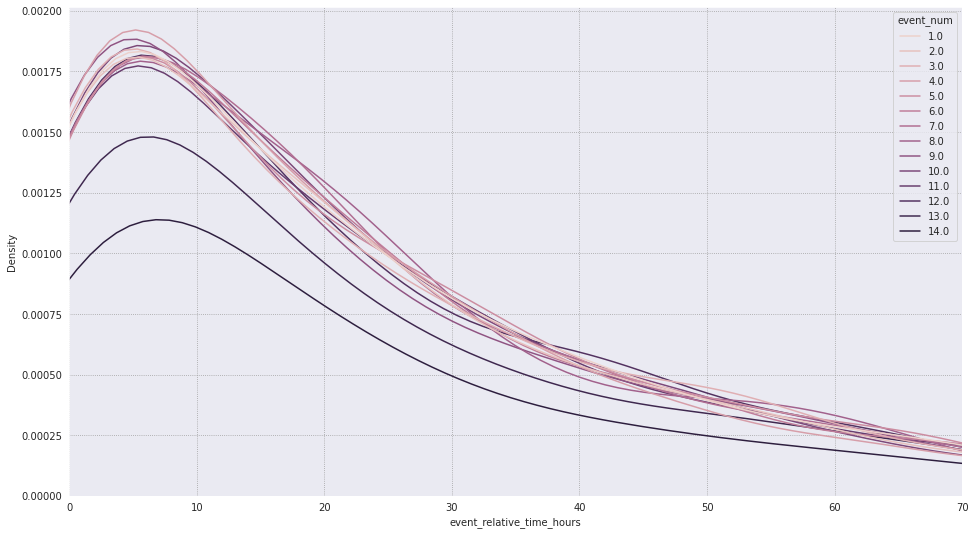

In [57]:
fig, ax = plt.subplots(figsize=(16,9))
plt.xlim(0,70)
_=sns.kdeplot('event_relative_time_hours', hue='event_num', data=tmp[tmp['stage_1_finish']== 'finished_by_project'], ax=ax)

In [58]:
tmp[tmp['stage_1_finish']== 'finished_by_project']['event_relative_time_hours'].mean()

25.290093964007006

Можно предположить, что это самая активная группа пользователей. Плотность пользователей на 14 событии, значительно выше, чем у других, оно более крутое справа, те дисперсия меньше. За счет этого среднее время между событиями может быть меньше, чем в других срезах.

Можно предположить, что этот срез пользователей играет дольше без потери интереса.

#### Динамика среднего времени между событиями в срезе способов прохождения 1го этапа

Плотности распределения не отражают динамику, чтобы лучше понять поведение пользователей и проверить предыдущие предположения, необходимо рассмотреть срезы пользователей в динамике. На данном этапе буду считать по среднему, не учитывая игровых окон в виде прайм тайма пользователей или времени суток.

In [59]:
tmp = ga_df.groupby(['stage_1_finish', 'event_num'], as_index=False)['event_relative_time_hours'].mean()

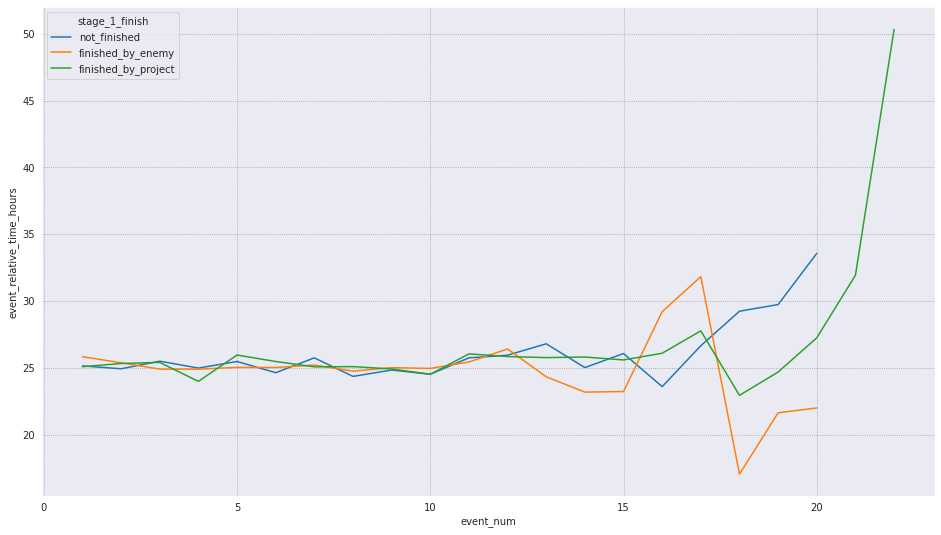

In [60]:
fig, ax = plt.subplots(figsize=(16,9))
hue_order = ['not_finished', 'finished_by_enemy', 'finished_by_project']
_=sns.lineplot(x = 'event_num', y='event_relative_time_hours', data=tmp,hue='stage_1_finish', ax=ax, hue_order=hue_order)

#plt.savefig(f'screen{screen_counter}.png'.format(screen_counter), bbox_inches='tight', dpi=120)
#screen_counter +=1

График подтверждает предыдущие предположения оБ активности пользователей в срезе прохождения 1го этапа. Наиболее активны в строительстве пользователи, заканчивающие проектом, менее активны пользователи, заканчивающие через победу над проитвником.  Разница в активности видна с первых действий и составляет 3-4 часа в среднем, это важно тк. теперь можно утверждать, что у этой группы пользователей в среднем всегда более высокая активность.

У пользователей не закончивших 1й этап переломный момент наступает примерно на 11-12 событии, начинает значительно расти время между событиями. Возможно это точка потери интереса.

#### Динамика кумулятивного среднего времени между событиями в срезе способов прохождения 1го этапа

Изменение среднего во времени должно отражает рост заинтересованности пользователей в игре, если доступные игровые события его отражают.

In [61]:
#Беру события после 1, что бы изебжать зашумления из за 0 времени.
tmp = ga_df[ga_df['event_num'] > 1].copy()
#Вычисляю комулятивное среднее время между событиями.
tmp['event_relative_time_hours_cum_mean'] = tmp.groupby('user_id')['event_relative_time_hours'].expanding().mean().reset_index()['event_relative_time_hours']

#Вычисляю среднее кумулятивное по срезу
tmp = tmp.groupby(['stage_1_finish', 'event_num'], as_index=False)['event_relative_time_hours_cum_mean'].mean()

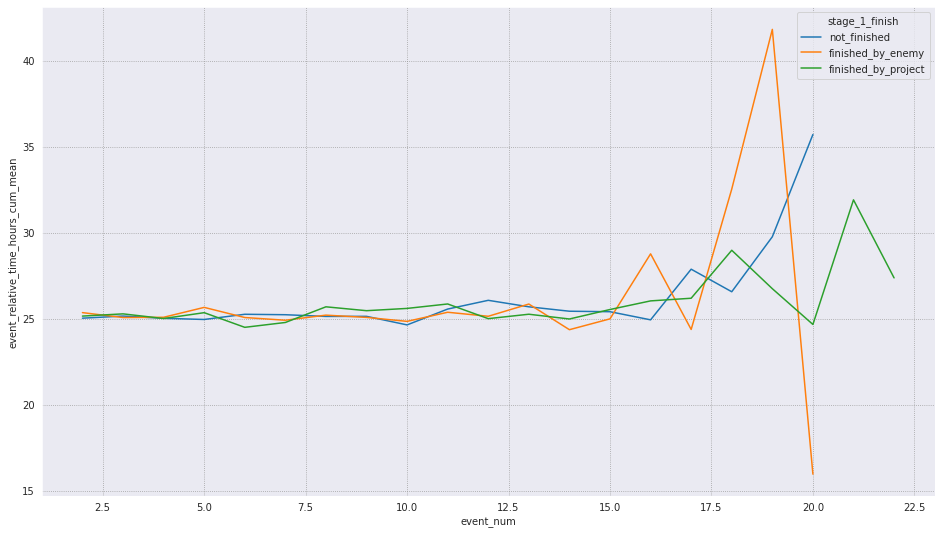

In [62]:
fig, ax = plt.subplots(figsize=(16,9))
hue_order = ['not_finished', 'finished_by_enemy', 'finished_by_project']
_=sns.lineplot(x='event_num', y='event_relative_time_hours_cum_mean', data=tmp, hue='stage_1_finish', ax=ax, hue_order=hue_order)

Похоже, события постройки не отражают интереса к игре для большинства пользователей, кроме тех, кто побеждает через проект, эта группа пользователей повышает свою активность перед победой 16-20 события.

#### Распределение пользователей по кол-ву игровых событий за игровое окно.

Время между совершением игровых событий имеет очень большую дисперсию и это видно по данным, некоторые события происходят с разницей в пару часов, а некоторые с разницей в 40. Разделю просто по суткам, чтобы примерно понять, сколько событий могут совершить пользователи за окно в 24ч.

In [63]:
ga_df['event_relative_time_hours'].std()

28.359033672190037

In [64]:
#Вычисляю число событий за каждые сутки 
#tmp = ga_df.groupby(['user_id','stage_1_finish',ga_df['event_datetime'].dt.date], as_index=False)['event'].count()

In [65]:
#Выисляю число событий за 8 часовое окно
tmp = ga_df.groupby(['user_id','stage_1_finish',pd.Grouper(key = 'event_datetime', freq='24H')], as_index=False)['event'].count()

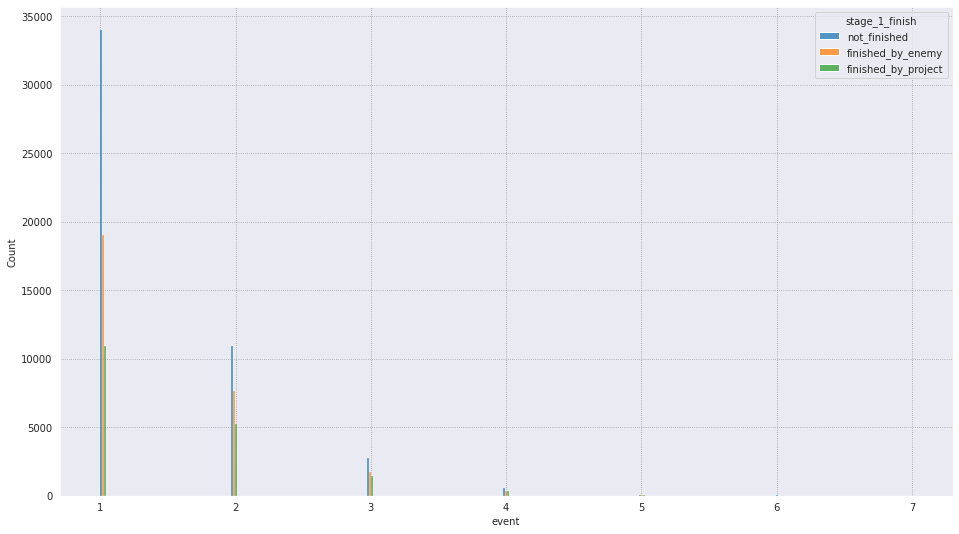

In [66]:
fig, ax = plt.subplots(figsize=(16,9))

_=sns.histplot(x='event', data=tmp,hue='stage_1_finish' , ax=ax, multiple='dodge')

По несколько событий за сутки совершают не часто. Но так же есть и аномальные пользователи совершающие от 3 до 5 событий.

### Влияние событий на совершение целевого события

На этом этапе требуется понять, есть ли какие-либо закономерности в игровых событиях, влияющие на завершение пользователем 1го этапа.
Так как завершение 1го этапа через победу над противником, нельзя спрогнозировать согласно доп. параметрам задачи. Наибольший интерес представляют пользователи, закончившие через проект или не закончившие 1й этап.

In [67]:
#Считаю постройки пользователя за игровой период
tmp = ga_df[['building_type','user_id','event']].\
pivot_table(index= 'user_id', columns='building_type', aggfunc='count', fill_value=0).reset_index()

tmp.columns = ['user_id', 'assembly_shop', 'research_center', 'spaceport']

In [68]:
#Добавляю в основные данные
ga_df = ga_df.join(tmp.set_index('user_id'), on='user_id')
users_profile = users_profile.join(tmp.set_index('user_id'), on='user_id')

#### Распределение пользователей по кол-ву игровых событий

In [69]:
tmp = ga_df.groupby('user_id')['event'].count().reset_index()

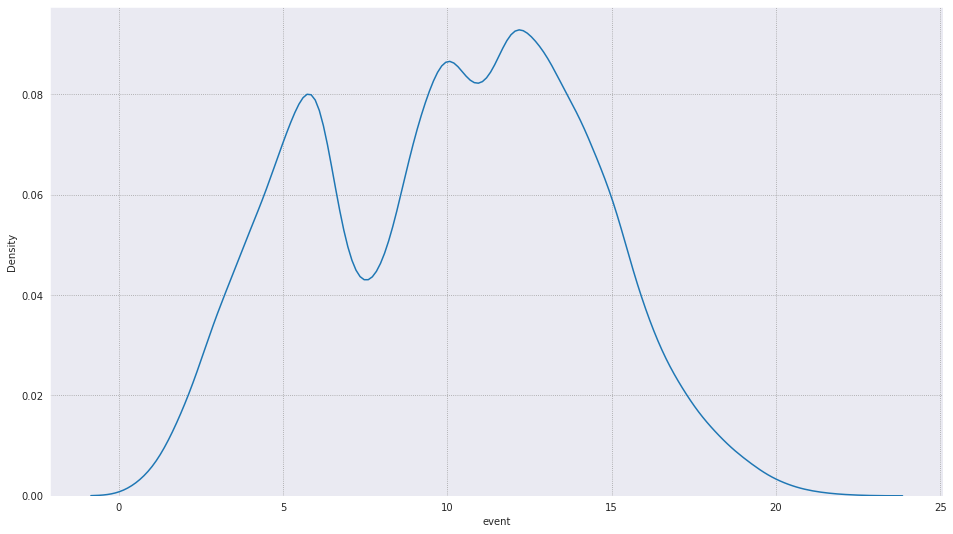

In [71]:
fig, ax = plt.subplots(figsize=(16,9))

_=sns.kdeplot('event', data=tmp, ax=ax)

Видно 3 вершины распределения, вероятно совпадающие со срезами игроков по способу прохождения 1 уровня.

#### Распределение пользователей по кол-ву игровых событий в срезе способа прохождения 1 уровня

Вычисляю кол-во событий на пользователя

In [72]:
tmp = ga_df.groupby(['user_id', 'stage_1_finish'])['event'].count().reset_index()
tmp.columns = ['user_id', 'stage_1_finish', 'events_count']

In [73]:
# Добавляю в основые таблицы
ga_df = ga_df.join(tmp.set_index('user_id').drop('stage_1_finish', axis=1), on='user_id')
users_profile = users_profile.join(tmp.set_index('user_id').drop('stage_1_finish', axis=1), on='user_id')

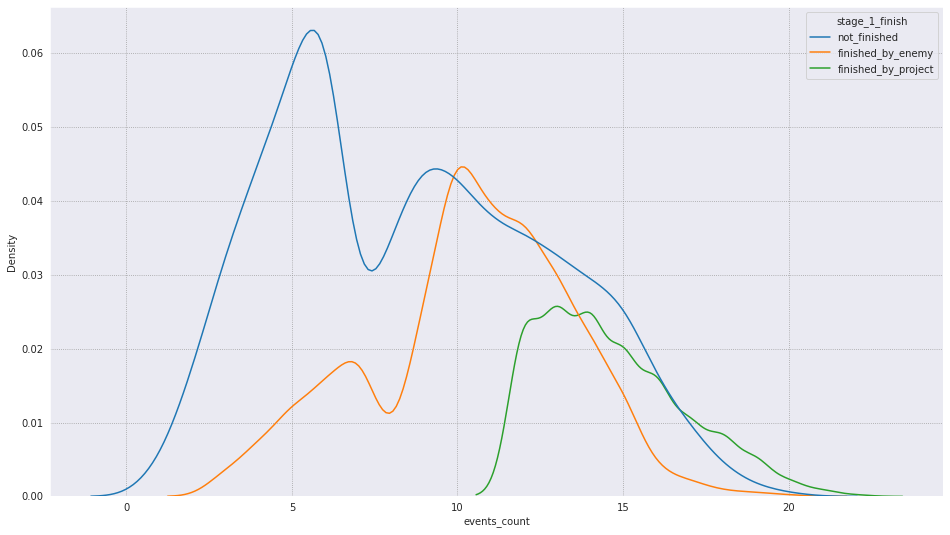

In [75]:
fig, ax = plt.subplots(figsize=(16,9))

_=sns.kdeplot('events_count',hue='stage_1_finish', data=tmp, ax=ax)

#plt.savefig(f'screen{screen_counter}.png'.format(screen_counter), bbox_inches='tight', dpi=120)
#screen_counter +=1

In [76]:
tmp[tmp['stage_1_finish'] == 'finished_by_enemy']['events_count'].min()

3

Однозначно можно сказать: 
* Пользователи, закончившие через проект, отыгрывают не менее 10 игровых событий.
* Пользователи, закончившие через победу над противником, крайне редко играют больше 15 игровых событий, но почти не имеют нижней границы, есть раунды заканчивающися 3 событиями.
* Первая волна оттока распределена вокруг 5 игрового события +- 3 события. Следующий рост оттока происходит на 10 событии.

#### Влияние постройки research_center на завершение 1 этапа

Без этой постройки не закончить 1й этап проектом. 

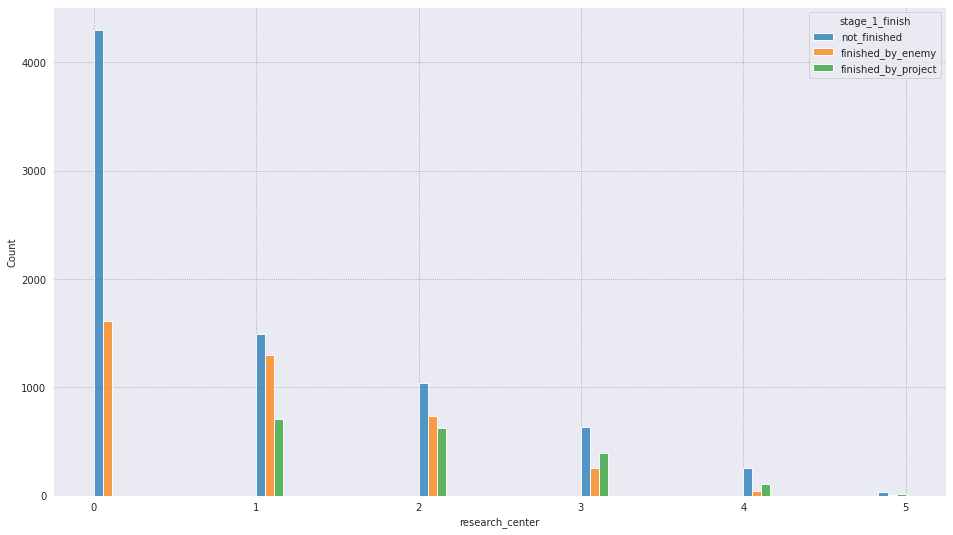

In [77]:
fig, ax = plt.subplots(figsize=(16,9))

_=sns.histplot(x='research_center',hue='stage_1_finish', data=users_profile, ax=ax, multiple='dodge')

Какого-либо паттерна не наблюдается. График скорее показывает, что большинство заканчивает игру на 1-2 постройке.

Так же понятно, что постройка research center не гарантирует завершение 1го этапа через проект в ближайшие ходы, тк. пользователей закончивших через проект и построивших 2-5 центра больше тех, кто построил 1 центр.

Довольно большая часть пользователей, закончившая победой над противником, так и не построила research_center. В зависимости от того сколько игровых действий они совршили можно понять, намеренно ли это было сделанно.

Отбираю пользователей с 0 research_center или закончивших проектом, чтобы было с чем сравнивать.

In [78]:
tmp = users_profile[(users_profile['research_center'] == 0)|(users_profile['stage_1_finish'] == 'finished_by_project')]

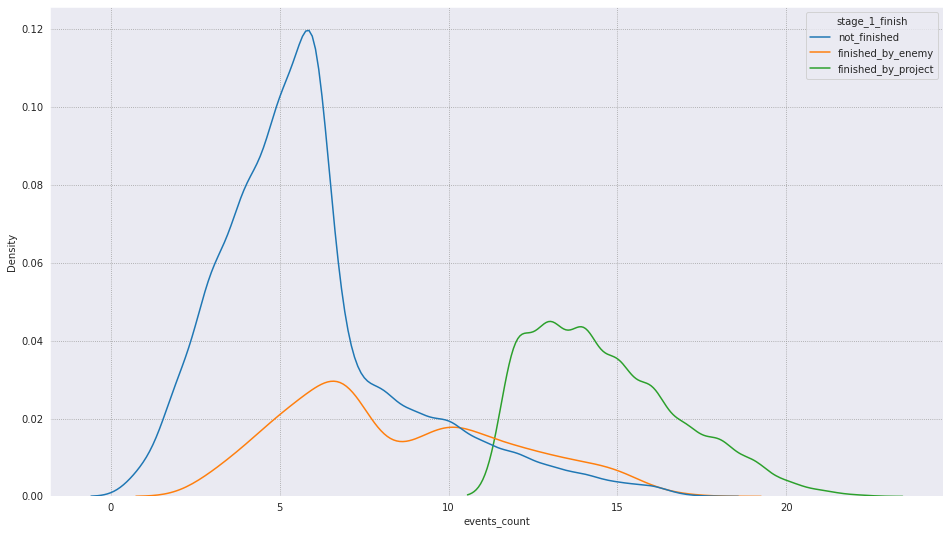

In [79]:
fig, ax = plt.subplots(figsize=(16,9))

_=sns.kdeplot(x='events_count', hue = 'stage_1_finish',data=tmp, ax=ax)

Распределение похоже на распределение пользователей по кол-ву игровых событий в срезе способа прохождения 1 уровня. Здесь отсутсвует холм над 10ми по счету событиями у не закончивших и победивших противника пользователей. Можно предположить, что некоторые пользователи не строят research_center, ориентируясь на сражения с другими игроками.

В рамках поставленной задачи от этого знания пользы нет, тк. выделенные пользователи в равной степене распределяются в срезе окончания 1 этапа, среди строящих и не строящих research_center.

#### Влияние момента первой постройки research_center

Определенный момент строительства research_center, может отражать игровую стратегию пользователя.

In [80]:
# Считаю номера событий первых построек research_center
tmp = ga_df[ga_df['building_type'] == 'research_center'].groupby(['user_id', 'stage_1_finish'], as_index=False)['event_num'].min()

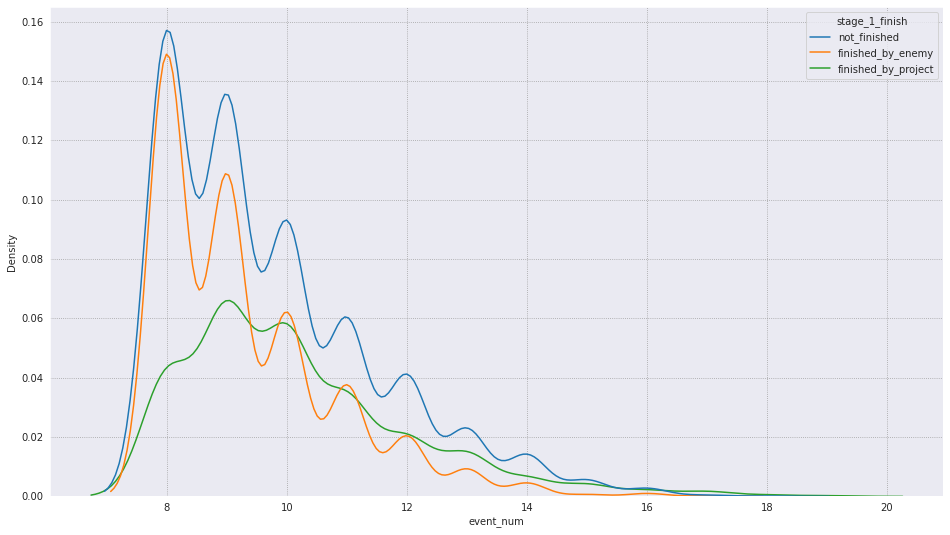

In [81]:
fig, ax = plt.subplots(figsize=(16,9))

_=sns.kdeplot(x='event_num', hue = 'stage_1_finish',data=tmp, ax=ax)

In [82]:
tmp.pivot_table(columns='stage_1_finish', values='event_num', aggfunc='mean')

stage_1_finish,finished_by_enemy,finished_by_project,not_finished
event_num,9.305295,10.175777,9.74242


В среднем более позднее строительтво research_center оказалось свойственно игрокам, заканчивающим через проект.

#### Распределения пользователей по сигнатуре игровых событий

## Cтатистические гипотезы

#### Гипотеза 1

Среднее время прохождения первого этапа у пользователей заканчивающих через проект и через победу над противником различается.

H0 -  Среднее равно, H1 - Среднее не равно.

In [86]:
alpha = .1
a1 = ga_df[ga_df['stage_1_finish'] == 'finished_by_project']['stage_1_days_spend'].values
a2 = ga_df[ga_df['stage_1_finish'] == 'finished_by_enemy']['stage_1_days_spend'].values
test_res = st.ttest_ind(a1, a2, equal_var = False)

print('p-value', test_res.pvalue)

if test_res.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value 0.0
Отвергаем нулевую гипотезу


Как и ожидалось, отвергаем нулевую гипотезу. Среднее время действительно отличается.

#### Гипотеза 2

Среднее время между игровыми событиями у пользователей заканчивающих через проект, меньше, чем у закончивших через победу над противником.

H0 -  Среднее равно, H1 - Среднее не равно.

In [89]:
a1 = ga_df[ga_df['stage_1_finish'] == 'finished_by_project']['event_relative_time_hours'].values

a2 = ga_df[ga_df['stage_1_finish'] == 'finished_by_enemy']['event_relative_time_hours'].values

alpha = .05 

results = st.ttest_ind(
    a1, 
    a2)

# тест односторонний: p-value будет в два раза меньше
print('p-значение:', results.pvalue )

# тест односторонний влево:
# отвергаем гипотезу только тогда, когда выборочное среднее значимо меньше предполагаемого значения
if (results.pvalue < alpha) and (a1.mean() < a2.mean()):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу") 

p-значение: 0.3606302124128338
Не отвергаем нулевую гипотезу


Не отвергаем нулевую гипотезу.

#### Гипотеза 3

Среднее время между игровыми событиями у пользователей, заканчивающих через победу над противником, меньше, чем у незакончивших пользователей. В ходе исследования эта гипотеза была подтверждена статистически. 

H0 -  Среднее равно, H1 - Среднее не равно.

In [90]:
a1 = ga_df[ga_df['stage_1_finish'] == 'finished_by_enemy']['event_relative_time_hours'].values

a2 = ga_df[ga_df['stage_1_finish'] == 'not_finished']['event_relative_time_hours'].values

alpha = .05 

results = st.ttest_ind(
    a1, 
    a2)

# тест односторонний: p-value будет в два раза меньше
print('p-значение:', results.pvalue )

# тест односторонний влево:
# отвергаем гипотезу только тогда, когда выборочное среднее значимо меньше предполагаемого значения
if (results.pvalue < alpha) and (a1.mean() < a2.mean()):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу") 

p-значение: 0.810823550174953
Не отвергаем нулевую гипотезу


Не отвергаем нулевую гипотезу.

## Формирование модели монетизации на основе EDA и гипотез

Согласно EDA и Статистическим гипотезам, выявлены следующие факторы в поведении пользователей, полезные для формирования рекламной модели:
* Основной отток пользователей распределяется вокруг 5 игрового события +-3 события. Таким образом, это неблагоприятный период для рекламы.
* Пользователей можно поделить по средней активности  
    * Для самых активных пользователей, набольшая вероятность закончить через проект.  
    * Для самых неактивных, вероятность уйти в отток после 13 события значительно увеличивается. Требуется окупиться раньше, чем они оттекут.
* Основная масса пользователей завершающих 1й игровой этап приходится на 9 - 17 игровое событие. Благоприятный период для рекламы.
* Пользователи заканчивающие проектом имеют больший средний срок прохождения 1го этапа, примерно, на несколько дней.
* Игровая активность в рамках построек имеет некоторые закономерности, через большие периоды без активности 16-50 часов, следуют более активные периоды 3-8 часов. Делается предположение, что за одну игровую сессию пользователь может построить более 1й постройки. Между игровыми сеансами благоприятный период для рекламы.  
  
 Согласно этим факторам предлагается 2 Варианта модели. В дополнительном варианте предлагается совершать дополнительный показ рекламы.

#### Основной вариант

In [90]:
N = 1

В случае невозможности дополнительных показов рекламы, предлагается использовать базовую рекламу начиная со 2 игрового события.

In [91]:
get_shows = (ga_df['event_num'] > N).sum()

In [92]:
get_shows - needed_shows

13441.0

In [93]:
сurrency = (get_shows - needed_shows)*0.07

In [94]:
сurrency

940.8700000000001

Это дает нам прибыль в 940 валюты.

#### Дополнительный вариант

In [95]:
N = 5

Оптимальным считаю показывать рекламу начиная с N=5 игрового действия, тк. в до этого момента пользователи еще не втянулись в игру и существует большая вероятность оттока.

In [96]:
get_shows = (ga_df['event_num'] > N).sum()

In [97]:
сurrency = (get_shows - needed_shows)*0.07

In [98]:
сurrency

-2675.7500000000005

При таком условии мы имеем убыток.

Этот убыток предлагается компенсировать за счет дополнительных показов базовой рекламы, распределенной след образом по двум приоритетам:
* Первым условием на рекламу будут случаи, когда перерыв между игровыми событиями более 24 часов.
* Вторым условием будет распределение пользователей по активности: 
    * К 8 игровому событию поделить пользователей на 3 группы по средней игровой активности(времени между игровыми событиями, низкая, средняя, высокая)
    * Пользователям с низкой игровой активностью показывать дополнительную рекламу с 8 события.
    * Пользователям с высокой игровой активность показывать дополнительную рекламу с 12 события.

In [ ]:
#События с 24ч перерывом.
h16_between_event_shows = ((ga_df['event_relative_time_hours'] > 24)).sum()

In [ ]:
# События согласно приоритету, но без 24ч перерыва.
endgame_close_shows = ((((ga_df['stage_1_finish'] == 'finished_by_project') & (ga_df['event_num'] > 11))|\
((ga_df['stage_1_finish'] != 'not_finished') & (ga_df['event_num'] > 7)))&\
~((ga_df['event_relative_time_hours'] > 16))).sum()

In [ ]:
((ga_df['event_num'] > 4).sum() - needed_shows)*0.07

In [ ]:
get_shows = (ga_df['event_num'] > N).sum() + h16_between_event_shows + endgame_close_shows

In [ ]:
сurrency = (get_shows - needed_shows)*0.07

In [ ]:
сurrency

In [ ]:
h16_between_event_shows + endgame_close_shows

Получаем 1811.88 прибыли и 64109 дополнительных показов рекламы.

## Вывод
Предлагается 2 варианта рекламной модели:
* Основной вариант:  
    Предлагается использовать базовую рекламу начиная со 2 игрового события. Это дает 940 валюты прибыли.  
      
        
* Дополнительный вариант:  
    Оптимальным считаю показывать рекламу начиная с N=5 игрового действия, тк. в до этого момента пользователи еще не втянулись в игру и существует большая вероятность оттока.
    Согласно указанным ниже условиям можно показывать 1 дополнительный ролик, чтобы компенсировать, потерянные показы:
    * Первым условием на рекламу будут случаи, когда перерыв между игровыми событиями более 24 часов.
    * Вторым условием будет распределение пользователей по активности: 
    * К 8 игровому событию поделить пользователей на 3 группы по средней игровой активности(времени между игровыми событиями, низкая, средняя, высокая)
    * Пользователям с низкой и средней игровой активностью показывать дополнительную рекламу с 8 события.
    * Пользователям с высокой игровой активность показывать дополнительную рекламу с 12 события.  
    
    Это дает 1811.88 валютной прибыли.
    
    
    
Полезные наблюдения:  
* Рекламные каналы facebook_ads и instagram_new_adverts, являются не выгодными. При равных параметрах пользователей, привлечение обходится на 30-40% дороже.
* Основная точка потери интереса пользователей к игре 10-13 игровое событие.